<a href="https://colab.research.google.com/github/krips2398/tensorflow_learnings/blob/master/house_price_prediction_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # most of the code is in tensorflow 1.0.0 so disabling v2 behaviour

In [0]:
# generation of houses between 1000 an 3500(typical sq ft of house)

In [0]:
num_houses = 160 # number of houses

In [0]:
np.random.seed(42)

Getting the house size data by selecting random numbers between 1000 and 3500 - selecting 160 numbers

In [0]:
house_size = np.random.randint(low=1000, high=3500, size=num_houses)

Generating house prices from house size with a random noise added.

In [0]:
np.random.seed(42)

In [0]:
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_houses)

Plot the data

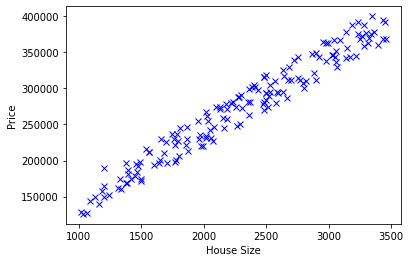

In [11]:
plt.plot(house_size, house_price,"bx") #blue x = bx
plt.ylabel("Price")
plt.xlabel("House Size")
plt.show()

Price = (sizeFactor * size) + priceOffset

There are four steps to do when we build any machine learning model


*   Data Preparation
*   Inference

*   Loss calculation
*   Optimize





**We need to do some Data Preparation**

First step is to normalize the data and then split this data into train and test sets. 70 % is used for training and 30% is used for testing

In [0]:
def normalize(array):
  return(array - array.mean()) / array.std()

In [0]:
num_train_samples = math.floor(num_houses * 0.7)

In [0]:
num_test_samples = math.floor(num_houses * 0.3)

In [0]:
# Defining the Training and Test Data

In [0]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

In [0]:
test_house_size = np.asarray(house_size[num_train_samples:])
test_price = np.asarray(house_price[num_train_samples:])

Normalizing the data

In [0]:
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

In [0]:
test_house_size_norm = normalize(test_house_size)
test_price_norm = normalize(test_price)

**Tensors Types**
 * Constant - constant value
 * Variable - values adjusted in the graph
 *  PlaceHolder - used to pass data into graph




In [0]:
tf_house_size = tf.placeholder("float", name="house_size") # tf_house_size is the object from tensorflow-->like in c or c++ somewhat like a pointer
tf_price = tf.placeholder("float", name="price")

In [0]:
# Defining the variables holding the size_factor and price we set during training
# We initialize them to some random values based on the normal distribution

In [0]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

In [0]:
# Defining operations to predict the house prices

In [0]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

In [0]:
## Define loss function

In [0]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price,2))/(2*num_train_samples)

In [0]:
learning_rate = 0.1

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [0]:
init = tf.global_variables_initializer() # Initializing the variables

In [0]:
# Launch the graph in session

In [71]:
test_house_size

array([1870, 1392, 1206, 2038, 2881, 2484, 1863, 1563, 2020, 1095, 2923,
       2757, 3278, 2678, 1540, 2059, 2183, 2722, 2819, 2597, 1795, 2051,
       2643, 2363, 2981, 2354, 2663, 2529, 3038, 2496, 3237, 2408, 2400,
       2306, 1972, 2768, 2282, 1709, 2479, 2434, 1648, 1317, 2257, 1683,
       1663, 2998, 2631, 2495])

In [72]:
with tf.Session() as sess:
  sess.run(init)
  # set how often to display training progress and number of training iterations
  display_every = 2
  num_training_iter = 50
   # calculate the number of lines to animation
  fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
  fit_size_factor = np.zeros(fit_num_plots)
  fit_price_offsets = np.zeros(fit_num_plots)
  fit_plot_idx = 0    


  #keep iterating the training data
  for iteration in range(num_training_iter):
    # Fit all training date
    for (x,y) in zip(train_house_size_norm, train_price_norm):
      sess.run(optimizer, feed_dict={tf_house_size:x, tf_price:y})
      # Display current status
      if (iteration + 1) % display_every == 0:
        c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
        print("iteration #:", '%04d' %(iteration + 1),"cost=","{:.9f}".format(c), \
              "size_factor=", sess.run(tf_size_factor),"price_offset=", sess.run(tf_price_offset))
  print("Optimization Finished!")
  training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
  print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')
  # train_house_size_mean = train_house_size.mean()
  # train_house_size_std = train_house_size.std()

  # train_price_mean = train_price.mean()
  # train_price_std = train_price.std()

  #   # Plot the graph
  # plt.rcParams["figure.figsize"] = (10,8)
  # plt.figure()
  # plt.ylabel("Price")
  # plt.xlabel("Size (sq.ft)")
  # plt.plot(train_house_size, train_price, 'go', label='Training data')
  # plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
  # plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
  #            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
  #            label='Learned Regression')
 
  # plt.legend(loc='upper left')
  # plt.show()



  #   # 
  #   # Plot another graph that animation of how Gradient Descent sequentually adjusted size_factor and price_offset to 
  #   # find the values that returned the "best" fit line.
  # fig, ax = plt.subplots()
  # line, = ax.plot(house_size, house_price)

  # plt.rcParams["figure.figsize"] = (10,8)
  # plt.title("Gradient Descent Fitting Regression Line")
  # plt.ylabel("Price")
  # plt.xlabel("Size (sq.ft)")
  # plt.plot(train_house_size, train_price, 'go', label='Training data')
  # plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
  # def animate(i):
  #       line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
  #       line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
  #       return line,
 
  #    # Init only required for blitting to give a clean slate.
  # def initAnim():
  #       line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
  #       return line,

  # ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
  #                                interval=1000, blit=True)

  # plt.show()   




iteration #: 0002 cost= 0.965986013 size_factor= -0.21705857 price_offset= 0.6779761
iteration #: 0002 cost= 0.965384722 size_factor= -0.21704885 price_offset= 0.6771058
iteration #: 0002 cost= 0.964743435 size_factor= -0.21688849 price_offset= 0.6764417
iteration #: 0002 cost= 0.964092135 size_factor= -0.2167036 price_offset= 0.6758055
iteration #: 0002 cost= 0.964065671 size_factor= -0.21681617 price_offset= 0.675567
iteration #: 0002 cost= 0.963689923 size_factor= -0.21623005 price_offset= 0.67604834
iteration #: 0002 cost= 0.959758401 size_factor= -0.21400844 price_offset= 0.67415595
iteration #: 0002 cost= 0.959356904 size_factor= -0.21396227 price_offset= 0.6736418
iteration #: 0002 cost= 0.954697788 size_factor= -0.21119697 price_offset= 0.6716159
iteration #: 0002 cost= 0.954684734 size_factor= -0.21120594 price_offset= 0.67158043
iteration #: 0002 cost= 0.954049170 size_factor= -0.21017388 price_offset= 0.6724626
iteration #: 0002 cost= 0.947790504 size_factor= -0.20625134 pri